In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from dask_jobqueue import SLURMCluster
from dask.distributed import Client
cluster = SLURMCluster(cores=12,
                     processes=12, memory="300GB",
                     project='P93300041',
                     walltime='01:00:00')
cluster.scale(12)
client = Client(cluster)

/glade/work/djk2120/casp_npl/lib/python3.6/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn("\n" + msg)


In [3]:
client

Client Scheduler: tcp://10.12.205.28:43257 Dashboard: http://10.12.205.28:46054/status,Cluster Workers: 12 Cores: 12 Memory: 300.00 GB


In [4]:
thedir = '/glade/scratch/djk2120/clm50c6_ctsmhardcodep_2deg_GSWP3V1_Sparse250_2000/run/'
fil = '*h0*.nc'
paths = sorted(glob.glob(thedir+fil))
%time ds = xr.open_mfdataset(paths,combine='by_coords',parallel=True)  #20 years, with dask (12 workers)

CPU times: user 1min 44s, sys: 3.6 s, total: 1min 48s
Wall time: 2min 1s


In [6]:
ds

<xarray.Dataset>
Dimensions:             (column: 1594, gridcell: 250, hist_interval: 2, landunit: 758, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 144, max_flds: 2500, max_nflds: 4, pft: 2782, scalar: 1, time: 240)
Coordinates:
  * time                (time) object 1991-02-01 00:00:00 ... 2011-01-01 00:00:00
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.10526 ... 88.10526 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, max_flds, max_nflds, pft, scalar
Data variables:
    mcdate              (time) float64 dask.array<shape=(240,), chunksize=(2,)>
    mcsec               (time) float64 dask.array<shape=(240,), chunksize=(2,)>
    md

In [9]:
ds['GPP']

<xarray.DataArray 'GPP' (time: 240, pft: 2782)>
dask.array<shape=(240, 2782), dtype=float32, chunksize=(2, 2782)>
Coordinates:
  * time     (time) object 1991-02-01 00:00:00 ... 2011-01-01 00:00:00
Dimensions without coordinates: pft
Attributes:
    long_name:     gross primary production
    units:         gC/m^2/s
    cell_methods:  time: mean

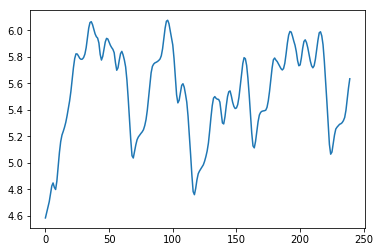

In [42]:
ix = g==np.max(g)
x = 24*60*60*ds['GPP'][:,ix]
l = ds['TLAI'][:,ix]
plt.plot(l)



In [67]:
x = np.zeros(100)
for i in range(100):
    x[i] = np.unique(ds['pfts1d_itype_veg'][i,:].values).size

In [117]:
pfts = np.mean(ds['pfts1d_itype_veg'],axis=1)

ds['GPP'].shape

(240, 2782)

In [132]:
pfts

<xarray.DataArray 'pfts1d_itype_veg' (pft: 2782)>
dask.array<shape=(2782,), dtype=float64, chunksize=(2782,)>
Dimensions without coordinates: pft

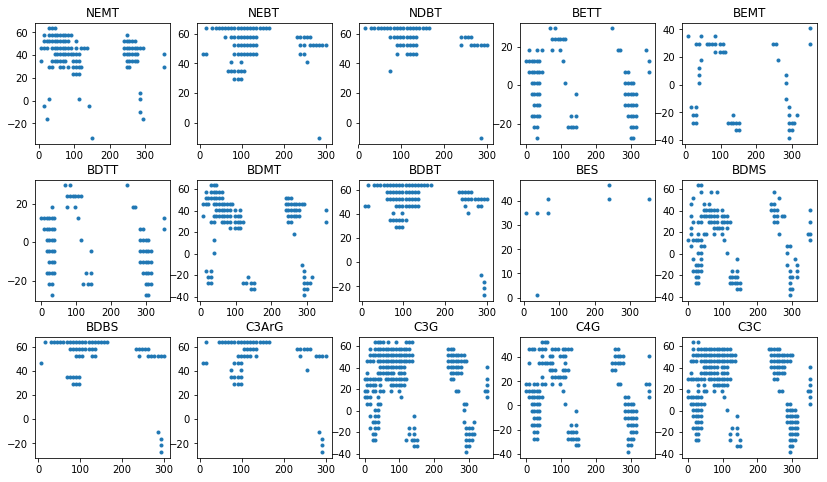

In [136]:
plt.figure(figsize=[14,8])
for i in 1+np.arange(15):
    ix = pfts==i
    x = np.mean(ds['pfts1d_lon'][pfts==i,:],axis=1)
    y = np.mean(ds['pfts1d_lat'][pfts==i,:],axis=1)
    plt.subplot(3,5,i)
    plt.plot(x,y,'.')
    plt.title(pftnames[i])
plt.subplots_adjust(hspace=0.3)

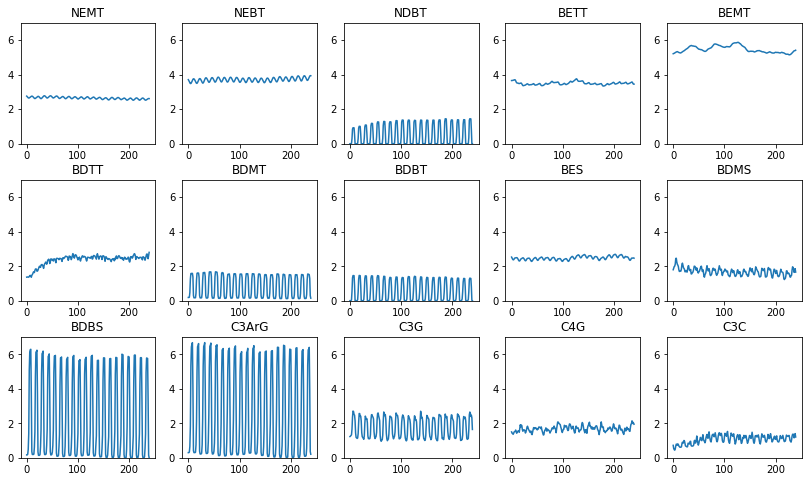

In [113]:
plt.figure(figsize=[14,8])
for i in 1+np.arange(15):
    ix = pfts==i
    x = np.mean(ds['TLAI'][:,ix],axis=1)
    plt.subplot(3,5,i)
    plt.plot(x)
    plt.ylim([0,7])
    plt.title(pftnames[i])
plt.subplots_adjust(hspace=0.3)

In [94]:
for i in 1+np.arange(15):
    print(str(params['pftname'][i].values)[2:-6])

needleleaf_evergreen_temperate_tree
needleleaf_evergreen_boreal_tree   
needleleaf_deciduous_boreal_tree   
broadleaf_evergreen_tropical_tree  
broadleaf_evergreen_temperate_tree 
broadleaf_deciduous_tropical_tree  
broadleaf_deciduous_temperate_tree 
broadleaf_deciduous_boreal_tree    
broadleaf_evergreen_shrub          
broadleaf_deciduous_temperate_shrub
broadleaf_deciduous_boreal_shrub   
c3_arctic_grass                    
c3_non-arctic_grass                
c4_grass                           
c3_crop                            


In [104]:
p = []
for i in 1+np.arange(15):
    pp = str.split(str(params['pftname'][i].values)[2:-3],'_')
    for ppp in pp:
        ppp=ppp.split(' ')[0]
        if ppp not in p:
            p = p+[ppp]

In [108]:
pftnames = ['BG','NEMT','NEBT','NDBT','BETT','BEMT','BDTT','BDMT','BDBT','BES','BDMS','BDBS','C3ArG','C3G','C4G','C3C']

In [110]:
for i in range(16):
    print(pftnames[i]+'  '+str(params['pftname'][i].values)[2:-6])

BG  not_vegetated                      
NEMT  needleleaf_evergreen_temperate_tree
NEBT  needleleaf_evergreen_boreal_tree   
NDBT  needleleaf_deciduous_boreal_tree   
BETT  broadleaf_evergreen_tropical_tree  
BEMT  broadleaf_evergreen_temperate_tree 
BDTT  broadleaf_deciduous_tropical_tree  
BDMT  broadleaf_deciduous_temperate_tree 
BDBT  broadleaf_deciduous_boreal_tree    
BES  broadleaf_evergreen_shrub          
BDMS  broadleaf_deciduous_temperate_shrub
BDBS  broadleaf_deciduous_boreal_shrub   
C3ArG  c3_arctic_grass                    
C3G  c3_non-arctic_grass                
C4G  c4_grass                           
C3C  c3_crop                            


In [121]:
ds

<xarray.Dataset>
Dimensions:             (column: 1594, gridcell: 250, hist_interval: 2, landunit: 758, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, lon: 144, max_flds: 2500, max_nflds: 4, pft: 2782, scalar: 1, time: 240)
Coordinates:
  * time                (time) object 1991-02-01 00:00:00 ... 2011-01-01 00:00:00
  * levgrnd             (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak              (levlak) float32 0.05 0.6 2.1 4.6 ... 25.6 34.325 44.775
  * levdcmp             (levdcmp) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * lon                 (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * lat                 (lat) float32 -90.0 -88.10526 ... 88.10526 90.0
Dimensions without coordinates: column, gridcell, hist_interval, landunit, max_flds, max_nflds, pft, scalar
Data variables:
    mcdate              (time) float64 dask.array<shape=(240,), chunksize=(2,)>
    mcsec               (time) float64 dask.array<shape=(240,), chunksize=(2,)>
    md